# **Linear classification using SVM**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
class Linear_classification_SVM:
    def __init__(
        self, learning_rate=0.001, iterations_quant=1000, reg_coefficient=0.001
    ):
        """This is a SVM linear classificator model class"""
        self._learning_rate = learning_rate
        self._iterations_quant = iterations_quant
        self._reg_coefficient = reg_coefficient
        self.w = None
        self.bias = None

    def fit(self, X, Y):
        """This function we need for training the model on the training set"""

        self._X = X
        self._Y = Y
        self._df_rows_quant, self._df_columns_quant = self._X.shape
        self.w = np.random.rand(self._df_columns_quant)
        self.bias = 0

        for i in range(self._iterations_quant):
            d_w = np.zeros(self._df_columns_quant)
            d_bias = 0

            for k in range(self._df_rows_quant):
                if 1 - self._Y[k] * np.dot(self._X[k], self.w) > 0:
                    d_w -= self._Y[k] * self._X[k]
                    d_bias -= Y[k]

            self.w -= self._learning_rate * (2 * self._reg_coefficient * self.w + d_w)
            self.bias -= self._learning_rate * d_bias

    def predict(self, X):
        """'This function predicts the values (class labels) for the sample that was passed as an argument"""

        return np.sign(np.dot(X, self.w)).astype("int64")

In [3]:
df = pd.read_csv(
    "D://ADMP_Anastasia/machine_learning/datasets/dataset_for_linear_classification_1.csv"
)
df

,x_1,x_2,y
0,3.395186,8.844288,1
1,5.551967,8.800227,1
2,7.689134,9.785068,1
3,5.772461,8.785153,1
4,0.428143,8.547947,1
...,...,...,...
305,0.398681,7.184006,1
306,7.871686,0.278526,-1
307,5.450716,1.760866,-1
308,8.971035,2.688999,-1


In [4]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1, 1)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=1 / 3, random_state=42
)

X_test_len = len(X_test)
Y_test_len = len(Y_test)

In [6]:
model = Linear_classification_SVM(0.0001, 10000, 0.2)
model.fit(X_train, Y_train)

In [7]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred.reshape(-1, 1)

In [8]:
w_list = list(model.w)
bias = model.bias

print("bias after training:", bias, "\n")

for i, w_i in enumerate(w_list):
    print("w_{} =".format(i + 1), w_list[i])

bias after training: [0.0473] 

w_1 = -0.49433973984974605
w_2 = 0.4944254414235398


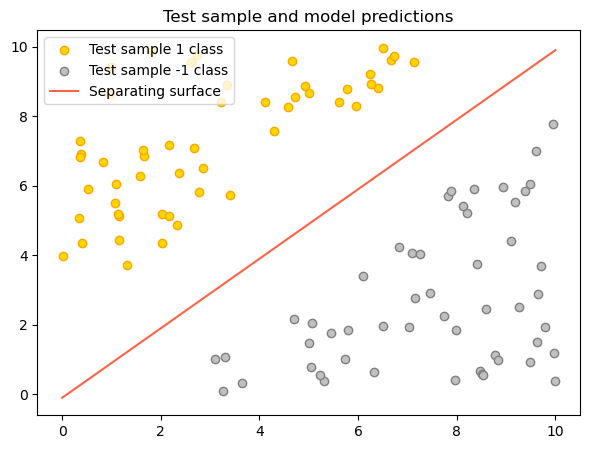

In [9]:
class_1_graph_x_1_values = []
class_1_graph_x_2_values = []
class_2_graph_x_1_values = []
class_2_graph_x_2_values = []

for i in range(Y_test_len):
    if Y_test[i] == 1:
        class_1_graph_x_1_values.append(X_test[i][0])
        class_1_graph_x_2_values.append(X_test[i][1])
    else:
        class_2_graph_x_1_values.append(X_test[i][0])
        class_2_graph_x_2_values.append(X_test[i][1])

separating_plane_horizontal_values = np.linspace(0, 10, 42)
separating_plane_vertical_values = (
    -(w_list[0] * separating_plane_horizontal_values + bias) / w_list[1]
)

figure, ax = plt.subplots()

figure.set_figwidth(7)
figure.set_figheight(5)

ax.set_title("Test sample and model predictions")

ax.scatter(
    class_1_graph_x_1_values,
    class_1_graph_x_2_values,
    color="gold",
    edgecolors="orange",
    label="Test sample 1 class",
)
ax.scatter(
    class_2_graph_x_1_values,
    class_2_graph_x_2_values,
    color="silver",
    edgecolors="gray",
    label="Test sample -1 class",
)
ax.plot(
    separating_plane_horizontal_values,
    separating_plane_vertical_values,
    color="tomato",
    label="Separating surface",
)

ax.legend()

plt.show()

In [10]:
accuracy_score_value = accuracy_score(Y_test, Y_pred)
accuracy_score_value

1.0

In [11]:
test_df = pd.DataFrame(
    np.concatenate((X_test, Y_test), axis=1, dtype=object), columns=["x_1", "x_2", "y"]
)
test_df

,x_1,x_2,y
0,2.014962,5.194453,1
1,7.14824,2.771948,-1
2,9.105824,4.402933,-1
3,9.476643,6.059579,-1
4,8.402912,3.739827,-1
...,...,...,...
99,9.601205,7.00903,-1
100,0.408263,4.353494,1
101,1.159999,4.431854,1
102,9.708678,3.704619,-1


In [12]:
test_df = pd.DataFrame(
    np.concatenate((X_test, Y_pred), axis=1, dtype=object), columns=["x_1", "x_2", "y"]
)
test_df

,x_1,x_2,y
0,2.014962,5.194453,1
1,7.14824,2.771948,-1
2,9.105824,4.402933,-1
3,9.476643,6.059579,-1
4,8.402912,3.739827,-1
...,...,...,...
99,9.601205,7.00903,-1
100,0.408263,4.353494,1
101,1.159999,4.431854,1
102,9.708678,3.704619,-1
